In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

#For model training and evaluation
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score,cross_validate


%matplotlib inline

### 1. Loading Datasets

In [18]:
df_sales = pd.read_csv('sales.csv',index_col=0)
df_stock_levels = pd.read_csv("sensor_stock_levels.csv",index_col=0)
df_temperature = pd.read_csv("sensor_storage_temperature.csv",index_col=0)

In [7]:
df_sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
df_stock_levels.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [5]:
df_temperature

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38
...,...,...,...
23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:40:43,-1.46
23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:07:49,-19.37
23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:15:41,-2.89
23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:44:52,-2.56


### Table Description:
* sales = sales data
* sensor_storage_temperature = IoT data from the temperature sensors in the storage facility for the products
* sensor_stock_levels = estimated stock levels of products based on IoT sensors


### 2. Data information

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


In [7]:
df_sales.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [8]:
df_stock_levels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 585.9+ KB


In [9]:
df_stock_levels.isnull().sum()

id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

In [10]:
df_stock_levels.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [11]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 746.6+ KB


In [19]:
df_temperature.isnull().sum()

id             0
timestamp      0
temperature    0
dtype: int64

In [13]:
df_temperature.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


* __There are no null values in any table__
* __Mean estimated stock pct is 50% and mean temperature is -0.2 where as max goes to 34__


### 3. Convert timestamp to datetime format

In [20]:
dataframes = [df_sales,df_stock_levels,df_temperature]

for i in dataframes:
    i['timestamp'] = pd.to_datetime(i['timestamp'])

In [21]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 746.6+ KB


In [16]:
df_sales['timestamp'].min() , df_sales['timestamp'].max()

(Timestamp('2022-03-01 09:00:13'), Timestamp('2022-03-07 19:59:54'))

In [17]:
df_stock_levels['timestamp'].min() , df_stock_levels['timestamp'].max()

(Timestamp('2022-03-01 09:00:03'), Timestamp('2022-03-07 19:59:22'))

In [18]:
df_temperature['timestamp'].min() , df_temperature['timestamp'].max()

(Timestamp('2022-03-01 09:00:08'), Timestamp('2022-03-07 19:59:50'))

__The data is of one week's time__

### 4. Merging datasets

__Problem Statement :-__
* Can we accurately predict the stock levels of products based on sales data and sensor data on an hourly basis in order to more intelligently procure products from our suppliers?”
* Since we need hourly basis data, we need to modify timestamp column accordingly

In [22]:
df_sales['timestamp_hourly'] = df_sales['timestamp'].dt.to_period(freq = 'H')
df_stock_levels['timestamp_hourly'] = df_stock_levels['timestamp'].dt.to_period(freq = 'H')
df_temperature['timestamp_hourly'] = df_temperature['timestamp'].dt.to_period(freq = 'H')

### In order to merge data, lets aggregate them on timestamp_hourly and product_id

In [23]:
df_sales_agg = df_sales.groupby(['timestamp_hourly', 'product_id']).agg({'quantity': 'sum'}).reset_index()
df_stock_levels_agg = df_stock_levels.groupby(['timestamp_hourly', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
df_temperature_agg = df_temperature.groupby('timestamp_hourly').agg({'temperature': 'mean'}).reset_index()

#### Since we need to predict stock levels of products based on  sales data and sensor data, we will keep stock aggregate dataset as base

In [24]:
merged_df = df_stock_levels_agg.merge(df_sales_agg, on=['timestamp_hourly', 'product_id'], how='left')
merged_df.head()

,timestamp_hourly,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [25]:
merged_df = merged_df.merge(df_temperature_agg,on=['timestamp_hourly'],how='left')
merged_df.head()

,timestamp_hourly,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   timestamp_hourly     10845 non-null  period[H]
 1   product_id           10845 non-null  object   
 2   estimated_stock_pct  10845 non-null  float64  
 3   quantity             3067 non-null   float64  
 4   temperature          10845 non-null  float64  
dtypes: float64(3), object(1), period[H](1)
memory usage: 508.4+ KB


#### There are few null values in quantity. This is because, not necessary every product at every hour of the day had to be sold.

* __We can replace null values with 0 products sold__

In [27]:
merged_df.isnull().sum()

timestamp_hourly          0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

In [28]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)


In [29]:
merged_df.head()

,timestamp_hourly,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885
3,2022-03-01 09:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885
4,2022-03-01 09:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885


We can combine some more features onto this table too, including category,customer type and unit_price.

In [30]:
product_categories = df_sales[['product_id','category']]
product_categories = product_categories.drop_duplicates()

product_price = df_sales[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()


__Now merging this on merged df__

In [31]:
merged_df = merged_df.merge(product_categories,on='product_id',how='left')

In [32]:
merged_df = merged_df.merge(product_price,on='product_id',how='left')

In [33]:
merged_df.head()

,timestamp_hourly,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   timestamp_hourly     10845 non-null  period[H]
 1   product_id           10845 non-null  object   
 2   estimated_stock_pct  10845 non-null  float64  
 3   quantity             10845 non-null  float64  
 4   temperature          10845 non-null  float64  
 5   category             10845 non-null  object   
 6   unit_price           10845 non-null  float64  
dtypes: float64(4), object(2), period[H](1)
memory usage: 677.8+ KB


In [585]:
# merged_df.to_csv('Merged_df_original_new.csv',index=False)

### 5. Feature Engineering
* __Handling categorical column and scaling numeric columns__

* We can drop product_id column as every row indicated unique product and time combination and it wont be useful for predictive mdoelling.
* Divide the timestamp into days of month, week, hour so that model learns better
* Handle category column as it is categorical in nature. Maybe use One hot encoding.


In [35]:
merged_df.drop('product_id',axis=1,inplace=True)

In [36]:
merged_df.head()

,timestamp_hourly,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00,0.05,0.0,-0.02885,pets,8.19


In [37]:
merged_df

,timestamp_hourly,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00,0.89,3.0,-0.028850,kitchen,11.19
1,2022-03-01 09:00,0.14,3.0,-0.028850,vegetables,1.49
2,2022-03-01 09:00,0.67,0.0,-0.028850,baby products,14.19
3,2022-03-01 09:00,0.82,0.0,-0.028850,beverages,20.19
4,2022-03-01 09:00,0.05,0.0,-0.028850,pets,8.19
...,...,...,...,...,...,...
10840,2022-03-07 19:00,0.50,4.0,-0.165077,fruit,4.99
10841,2022-03-07 19:00,0.26,0.0,-0.165077,meat,19.99
10842,2022-03-07 19:00,0.78,3.0,-0.165077,packaged foods,6.99
10843,2022-03-07 19:00,0.92,3.0,-0.165077,meat,14.99


In [38]:
merged_df['day_of_month'] = merged_df['timestamp_hourly'].dt.day


In [39]:
merged_df['hour'] = merged_df['timestamp_hourly'].dt.hour

In [40]:
merged_df.drop('timestamp_hourly',axis=1,inplace=True)

In [41]:
merged_df.head()

,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_month,hour
0,0.89,3.0,-0.02885,kitchen,11.19,1,9
1,0.14,3.0,-0.02885,vegetables,1.49,1,9
2,0.67,0.0,-0.02885,baby products,14.19,1,9
3,0.82,0.0,-0.02885,beverages,20.19,1,9
4,0.05,0.0,-0.02885,pets,8.19,1,9


Saving Merged_df file

__Lets check how many categories does category column have, then apply OHE__

In [27]:
merged_df['category'].unique()

array(['kitchen', 'vegetables', 'baby products', 'beverages', 'pets',
       'meat', 'fruit', 'spices and herbs', 'frozen', 'medicine',
       'baking', 'personal care', 'cleaning products', 'dairy',
       'condiments and sauces', 'refrigerated items', 'packaged foods',
       'baked goods', 'snacks', 'cheese', 'canned foods', 'seafood'],
      dtype=object)

In [28]:
merged_df['category'].value_counts()

beverages                552
baked goods              542
snacks                   541
frozen                   532
refrigerated items       522
baking                   519
condiments and sauces    517
cleaning products        507
personal care            506
medicine                 501
spices and herbs         492
cheese                   489
seafood                  488
baby products            488
fruit                    477
kitchen                  472
meat                     471
vegetables               469
canned foods             469
packaged foods           435
pets                     429
dairy                    427
Name: category, dtype: int64

* __Normally, if we have a lot of unique categories, we take top N categories and label the rest as "others". However, here, the frequency of all categories are moore or less in the same range. We will consider all categories.__

#### Before scaling and encoding, we must split dataset into train and test set.

In [42]:
merged_df1 = merged_df.copy()

In [43]:
X = merged_df1.drop('estimated_stock_pct',axis=1)
y = merged_df1['estimated_stock_pct']

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
X_train.shape,X_test.shape

((8676, 6), (2169, 6))

In [46]:
X.columns

Index(['quantity', 'temperature', 'category', 'unit_price', 'day_of_month',
       'hour'],
      dtype='object')

#### We will use, pipeline and column transformer

In [47]:
sc = StandardScaler()
ohe = OneHotEncoder()

In [48]:
num_col = [col for col in X.columns if X[col].dtype != 'O']
num_col

['quantity', 'temperature', 'unit_price', 'day_of_month', 'hour']

In [49]:
cat_col = [col for col in X.columns if col not in num_col]
cat_col

['category']

In [50]:
preprocessing_transformer = ColumnTransformer(
                                transformers =[
                                    ('ohe',ohe,cat_col),
                                    ('standard_sclaler',sc,num_col)
                                ]
                            )

In [51]:
pipeline = Pipeline(steps=[('preprocessor', preprocessing_transformer)])

In [52]:
X_train_processed = pipeline.fit_transform(X_train).toarray()


In [53]:
X_test_processed = pipeline.transform(X_test).toarray()

In [54]:
joblib.dump(pipeline,'transforamtion_pipeline.pkl')

['transforamtion_pipeline.pkl']

* Getting OHE column names and addidng it to standard scaler column names

In [41]:
column_names = list(pipeline.named_steps['preprocessor'].named_transformers_['ohe'].get_feature_names_out(cat_col)) + list(num_col)

In [42]:
X_train_processed = pd.DataFrame(X_train_processed,columns =column_names)
X_test_processed = pd.DataFrame(X_test_processed,columns =column_names)

In [43]:
X_train_processed.head()

,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,category_condiments and sauces,category_dairy,category_frozen,...,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,quantity,temperature,unit_price,day_of_month,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,0.243934,1.487798,0.491681,0.635836
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,-0.799070,-0.179331,-0.008474,0.635836
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,-1.128592,-0.642422,1.491990,0.319377
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,1.354878,-0.642422,0.491681,-0.313541
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,0.160577,0.413426,1.491990,0.002918


In [44]:
X_test_processed.head()

,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,category_condiments and sauces,category_dairy,category_frozen,...,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,quantity,temperature,unit_price,day_of_month,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.060016,0.848670,0.228189,-1.008784,-0.630000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,-0.994784,-1.383369,-1.008784,-1.262918
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,0.513797,-0.179331,0.491681,0.002918
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,-1.447069,-0.364568,-0.008474,-0.630000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.505349,-0.538280,2.228744,-1.508939,-0.946459


In [45]:
X_train_processed.shape, X_test_processed.shape

((8676, 27), (2169, 27))

In [148]:
# X_train_processed.to_csv('Merged_datasets/Preprocessed_original/X_train_processed.csv',index=False)
# y_train.to_csv('Merged_datasets/Preprocessed_original/y_train.csv',index=False)

# X_test_processed.to_csv('Merged_datasets/Preprocessed_original/X_test_processed.csv',index=False)
# y_test.to_csv('Merged_datasets/Preprocessed_original/y_test.csv',index=False)

### Now we are done with encoding and scaling

# 6. Model Training

* ### We will first train using default models and then perform hyperparameter tuning

Default Models Dictionary

In [26]:
default_model_dict = {
    'Random Forest': RandomForestRegressor(),
    'SVR' : SVR(),
    'GradientBoosting' : GradientBoostingRegressor(),
    'AdaboostRegressor' : AdaBoostRegressor()

}

Training and Evaluation Helper function

In [46]:
def train_models(model_dict, X_train, y_train):
    fitted_models = {}
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        fitted_models[name] = model
    return fitted_models

def evaluate_models(fitted_models, X_train, X_test, y_train, y_test):
    metrics = ['RMSE', 'MAE', 'R2']
    report = pd.DataFrame(index=list(fitted_models.keys()), columns=metrics)
    for name, model in fitted_models.items():
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_test_pred,squared=False)
        mae = mean_absolute_error(y_test, y_test_pred)
        r2 = r2_score(y_test, y_test_pred)
        report.loc[name] = [rmse, mae, r2]
    return report

* __Using cross validation will give us insights into robust models__

In [47]:
def train_models_cv(model_dict, X_train, y_train, cv=5):
    cv_scores = {}
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], return_train_score=True)
        cv_scores[name] = {
            'avg_r2': np.mean(scores['test_r2']),
            'avg_mae': -np.mean(scores['test_neg_mean_absolute_error']),  # note the negation for mae_scores
            'avg_rmse': np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))  # note the negation and sqrt for rmse_scores
        }

    # Convert cv_scores to DataFrame
    cv_scores_df = pd.DataFrame(cv_scores).T

    return cv_scores_df

* Corss validation output

In [48]:
cv_Scores_df = train_models_cv(default_model_dict, X_train_processed, y_train,cv=5)

In [49]:
cv_Scores_df

,avg_r2,avg_mae,avg_rmse
Random Forest,-0.143945,0.235839,0.282979
SVR,-0.102190,0.231949,0.277769
GradientBoosting,-0.012068,0.223771,0.266167
AdaboostRegressor,-0.002267,0.222823,0.264877


In [54]:
cv_Scores_df.to_csv('Reports/Cross_validate/CV_scores_originaldf.csv')

* Default training output

In [50]:
def_trained_models = train_models(default_model_dict, X_train_processed, y_train)

In [51]:
default_report = evaluate_models(def_trained_models, X_train_processed, X_test_processed, y_train, y_test)

In [52]:
default_report

,RMSE,MAE,R2
Random Forest,0.283031,0.23542,-0.14863
SVR,0.276302,0.230163,-0.094661
GradientBoosting,0.264969,0.222582,-0.006704
AdaboostRegressor,0.264153,0.222318,-0.000512


In [53]:
default_report.to_csv('Reports/Default_reports/Default_report.csv')

### Insights:
* MAE is not so good with 0.22-0.25 also R2 is in negative that states that model is performing worse than the average output.
* MAE of 0.22 means the predicted values are 0.22 units away from average. 0.22 is 44% of 0.51 which is the average estimated stock level pct .


### Feature selection using f_regression

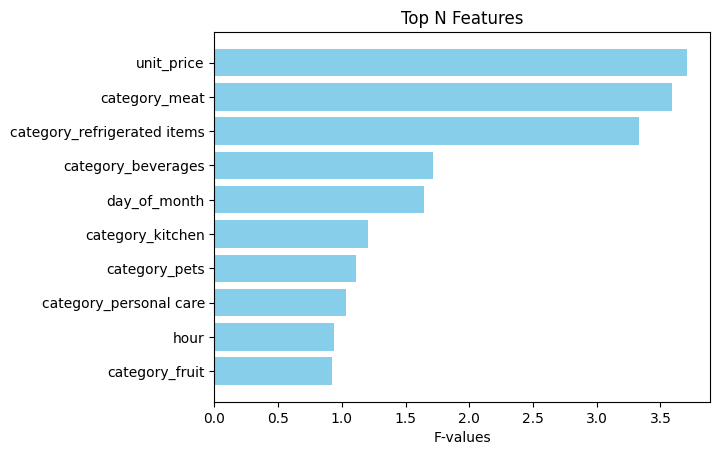

In [199]:
def select_features(X_train, y_train, N):
    # Perform f_regression
    f_values, p_values = f_regression(X_train, y_train)
    
    # Get the indices sorted by f_values
    indices = np.argsort(f_values)
    
    # Select top N indices
    top_n_indices = indices[-N:]
    
    # Get feature names
    top_n_feature_names = X_train.columns[top_n_indices]
    
    # Get corresponding f_values
    top_n_f_values = f_values[top_n_indices]
    
    return top_n_feature_names, top_n_f_values

def plot_features(feature_names, f_values):
    # Create horizontal bar plot
    plt.barh(feature_names, f_values, color='skyblue')
    plt.xlabel('F-values')
    plt.title('Top N Features')
    plt.show()

# Assuming X_train and y_train are defined
N = 10  # Change this to the number of features you want
top_n_feature_names, top_n_f_values = select_features(X_train_processed, y_train, N)
plot_features(top_n_feature_names, top_n_f_values)

In [201]:
top_n_feature_names.to_list()

['category_fruit',
 'hour',
 'category_personal care',
 'category_pets',
 'category_kitchen',
 'day_of_month',
 'category_beverages',
 'category_refrigerated items',
 'category_meat',
 'unit_price']

We will filter out columns based on the above graph and then try model training.

In [204]:
Xtr = X_train_processed[top_n_feature_names.to_list()]
Xts = X_test_processed[top_n_feature_names.to_list()]

In [205]:
Xtr.shape,Xts.shape

((8676, 10), (2169, 10))

In [226]:
# Xtr.to_csv('Merged_datasets/Preprocessed_fregression/Xtr_freg.csv',index=False)
# Xts.to_csv('Merged_datasets/Preprocessed_fregression/Xts_freg.csv',index=False)
# y_train.to_csv('Merged_datasets/Preprocessed_fregression/y_train.csv',index=False)
# y_test.to_csv('Merged_datasets/Preprocessed_fregression/y_test.csv',index=False)

__We narrowed down to 10 features out of 27__

In [222]:
cv_Scores_df_freg = train_models_cv(default_model_dict, Xtr, y_train,cv=5)

In [223]:
cv_Scores_df_freg

,avg_r2,avg_mae,avg_rmse
Linear Regression,-0.000951,0.222604,0.264703
Decision Tree,-0.891224,0.295981,0.363797
Random Forest,-0.290635,0.247575,0.300566
SVR,-0.041362,0.226310,0.269994
GradientBoosting,-0.010989,0.223731,0.266028


In [229]:
# cv_Scores_df_freg.to_csv('Reports/Cross_validate/CV_scores_freg.csv')

In [236]:
def_mod_freg = train_models(default_model_dict, Xtr, y_train,)

In [237]:
def_mod_freg = evaluate_models(def_mod_freg, Xtr, Xts, y_train, y_test)

In [239]:
def_mod_freg

,RMSE,MAE,R2
Linear Regression,0.264306,0.222208,-0.001671
Decision Tree,0.361029,0.294953,-0.868941
Random Forest,0.302746,0.249984,-0.314224
SVR,0.268629,0.224926,-0.034707
GradientBoosting,0.265955,0.223217,-0.014211


In [240]:
# def_mod_freg.to_csv('Reports/Cross_validate/default_scores_freg.csv')

### Insights:
* Not much of a difference compared to earlier.
* We need to improve R2 and lower MAE,RMSE.

# 7. Adding Few new columns

In [621]:
df_merged_og = pd.read_csv('Merged_datasets/Merged_df_original_new.csv')
df_merged_og.head()

,timestamp_hourly,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [622]:
df_merged_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp_hourly     10845 non-null  object 
 1   product_id           10845 non-null  object 
 2   estimated_stock_pct  10845 non-null  float64
 3   quantity             10845 non-null  float64
 4   temperature          10845 non-null  float64
 5   category             10845 non-null  object 
 6   unit_price           10845 non-null  float64
dtypes: float64(4), object(3)
memory usage: 593.2+ KB


In [623]:
df_merged_og['timestamp_hourly'] = pd.to_datetime(df_merged_og['timestamp_hourly'])

df_merged_og['day_of_week'] = df_merged_og['timestamp_hourly'].dt.dayofweek

# Add is_weekend feature
df_merged_og['is_weekend'] = df_merged_og['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Add month feature
df_merged_og['month'] = df_merged_og['timestamp_hourly'].dt.month

df_merged_og['hour'] = df_merged_og['timestamp_hourly'].dt.hour

In [603]:
df_merged_og.head()

,timestamp_hourly,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_week,is_weekend,month,hour
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,0,3,9
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,0,3,9
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,0,3,9
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,0,3,9
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,0,3,9


In [624]:
# Add lagged features
df_merged_og['quantity_lag1'] = df_merged_og.groupby('product_id')['quantity'].shift(1)
df_merged_og['temperature_lag1'] = df_merged_og['temperature'].shift(1)

# Add rolling window statistics
df_merged_og['quantity_rolling_avg3'] = df_merged_og.groupby('product_id')['quantity'].transform(lambda x: x.rolling(3).mean())
df_merged_og['temperature_rolling_avg3'] = df_merged_og['temperature'].transform(lambda x: x.rolling(3).mean())

In [625]:
df_merged_og

,timestamp_hourly,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_week,is_weekend,month,hour,quantity_lag1,temperature_lag1,quantity_rolling_avg3,temperature_rolling_avg3
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850,kitchen,11.19,1,0,3,9,NaN,NaN,NaN,NaN
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850,vegetables,1.49,1,0,3,9,NaN,-0.028850,NaN,NaN
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.028850,baby products,14.19,1,0,3,9,NaN,-0.028850,NaN,-0.028850
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.028850,beverages,20.19,1,0,3,9,NaN,-0.028850,NaN,-0.028850
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.028850,pets,8.19,1,0,3,9,NaN,-0.028850,NaN,-0.028850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077,fruit,4.99,0,0,3,19,0.0,-0.165077,2.666667,-0.165077
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,0.0,-0.165077,meat,19.99,0,0,3,19,2.0,-0.165077,0.666667,-0.165077
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077,packaged foods,6.99,0,0,3,19,0.0,-0.165077,2.000000,-0.165077
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat,14.99,0,0,3,19,0.0,-0.165077,1.000000,-0.165077


In [626]:
df_merged_og.dropna(axis=0,inplace=True)

In [627]:
df_merged_og.drop(['timestamp_hourly','product_id'],axis=1,inplace=True)

In [629]:
X = df_merged_og.drop('estimated_stock_pct',axis=1)
y = df_merged_og['estimated_stock_pct']

In [613]:
X.drop('category',axis=1,inplace=True)

In [614]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [615]:
sc1 = StandardScaler()


In [616]:
X_train = pd.DataFrame(sc1.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc1.transform(X_test),columns=X_test.columns)


In [617]:
rep = train_models_cv(model_dict, X_train, y_train, cv=5)

In [618]:
rep

,avg_r2,avg_mae,avg_rmse
Linear Regression,-0.001277,0.222761,0.264794
Decision Tree,-0.999731,0.305832,0.374251
Random Forest,-0.209872,0.241383,0.291072
SVR,-0.058364,0.228115,0.272272
GradientBoosting,-0.009740,0.223651,0.265922


## Insights:
* ### Adding few columns wont change anything.

In [3]:
df = pd.read_csv('Merged_datasets/Merged_df_original_new.csv')
df

,timestamp_hourly,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850,kitchen,11.19
1,2022-03-01 09:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850,vegetables,1.49
2,2022-03-01 09:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.028850,baby products,14.19
3,2022-03-01 09:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.028850,beverages,20.19
4,2022-03-01 09:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.028850,pets,8.19
...,...,...,...,...,...,...,...
10840,2022-03-07 19:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077,fruit,4.99
10841,2022-03-07 19:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,0.0,-0.165077,meat,19.99
10842,2022-03-07 19:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077,packaged foods,6.99
10843,2022-03-07 19:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat,14.99


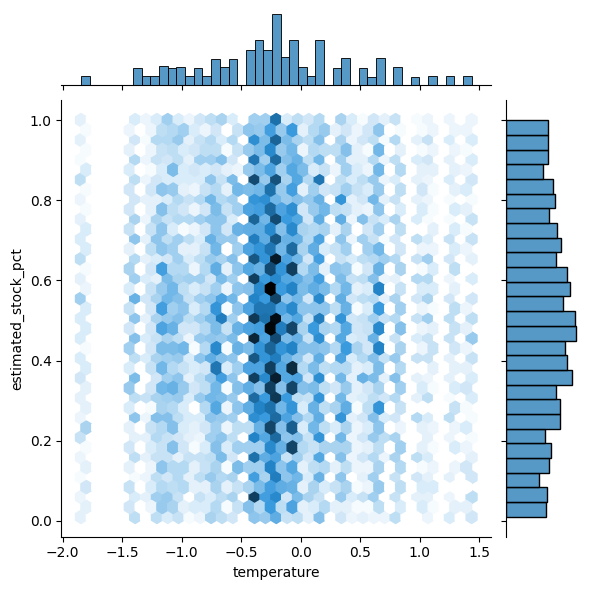

In [4]:
sns.jointplot(data=df, x= 'temperature',y='estimated_stock_pct',kind='hex')

## Insight:
* We can see that the average hourly temperature  where more products have 0.4 - 0.6 estimated stock pct is between -0.5 to 0 degree and dark spots mean that many products at different hours and varieties had that pc